## Inspecting the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('all_signals.csv')
#data.iloc[1000:1200,:]
data

,actual,predict1,predict2,predict3,predict4,predict5,predict6
0,0.0,20.792572,2.264052,2.264052,2.264052,2.264052,9.764052
1,0.0,19.428677,0.900157,0.900157,0.900157,0.900157,8.400157
2,0.0,20.007258,2.940019,2.940019,1.478738,1.478738,8.978738
3,0.0,21.269413,4.202174,4.202174,2.740893,2.740893,10.240893
4,0.0,20.896078,3.828839,3.828839,2.367558,2.367558,9.867558
...,...,...,...,...,...,...,...
30482,0.0,18.439183,NaN,NaN,NaN,NaN,NaN
30483,0.0,20.028197,NaN,NaN,NaN,NaN,NaN
30484,0.0,17.293372,NaN,NaN,NaN,NaN,NaN
30485,0.0,19.587188,NaN,NaN,NaN,NaN,NaN


In [2]:
data1 = data[data.actual == 0]
data1

,actual,predict1,predict2,predict3,predict4,predict5,predict6
0,0.0,20.792572,2.264052,2.264052,2.264052,2.264052,9.764052
1,0.0,19.428677,0.900157,0.900157,0.900157,0.900157,8.400157
2,0.0,20.007258,2.940019,2.940019,1.478738,1.478738,8.978738
3,0.0,21.269413,4.202174,4.202174,2.740893,2.740893,10.240893
4,0.0,20.896078,3.828839,3.828839,2.367558,2.367558,9.867558
...,...,...,...,...,...,...,...
30482,0.0,18.439183,NaN,NaN,NaN,NaN,NaN
30483,0.0,20.028197,NaN,NaN,NaN,NaN,NaN
30484,0.0,17.293372,NaN,NaN,NaN,NaN,NaN
30485,0.0,19.587188,NaN,NaN,NaN,NaN,NaN


### Visualizing before frequency conversion

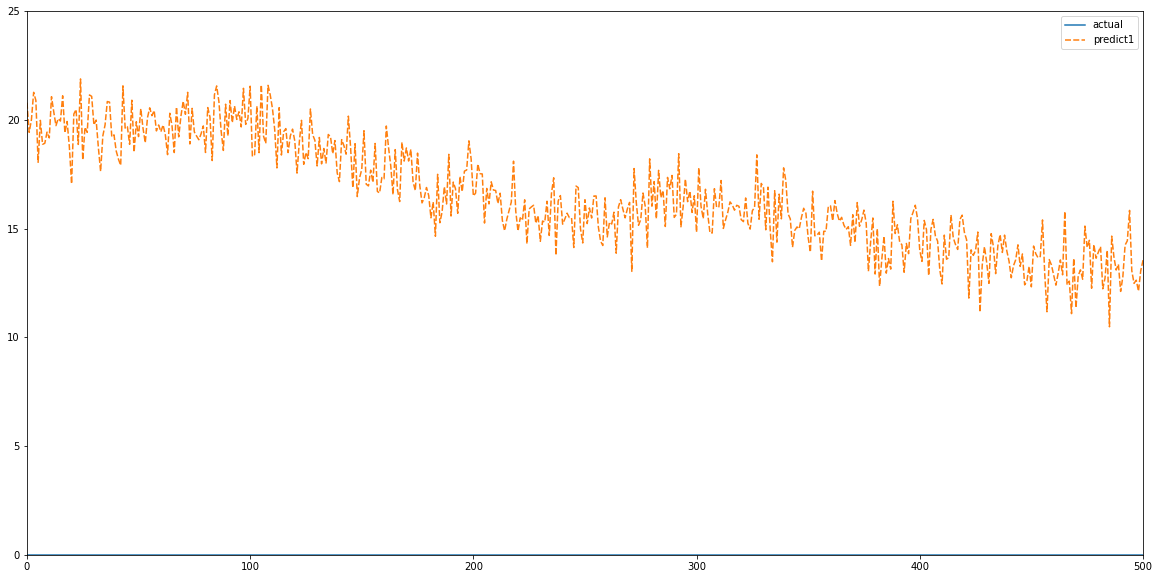

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_speed = data[["actual", "predict1"]]
plt.figure(figsize=(20,10))
sns.lineplot(data=actual_speed)
plt.axis([0,500,0,25])
plt.show()

In [8]:
from fastdtw import *
from scipy.spatial.distance import *

def synchronizise(column1, column2):
    data[column1] = data[column1].fillna(data[column1].mean())
    data[column2] = data[column2].fillna(data[column2].mean())
    x = data[column1]
    y = data[column2]
    
    # using the dynamic time warping model:
    distance, path = fastdtw(x, y, dist=euclidean)
    result = []
    for i in range(0,len(path)):
        result.append([data[column1].iloc[path[i][0]], data[column2].iloc[path[i][1]]])
        
    data_sync = pd.DataFrame(data=result,columns=[column1, column2])
    return data_sync

In [9]:
data_sync = synchronizise('actual', 'predict1')

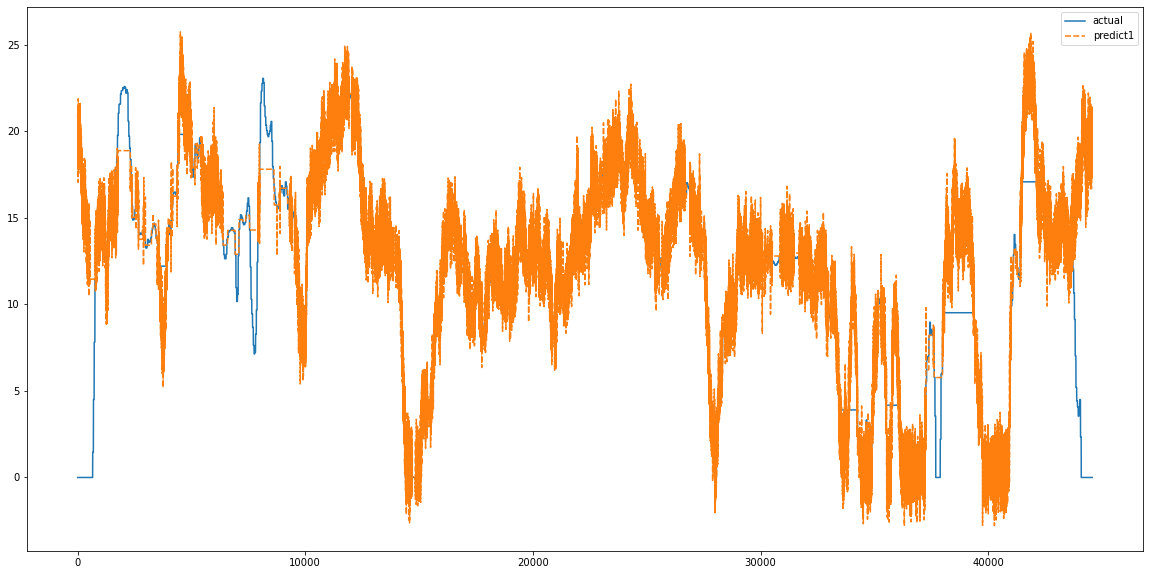

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_speed = data_sync[["actual", "predict1"]]
plt.figure(figsize=(20,10))
sns.lineplot(data=actual_speed)
plt.show()

### Converting the actual speed from 30hz to 10hz:

In [11]:
data['actual'] = data.actual.apply(lambda x: (10 * x)/30)
data.iloc[1000:1200,:]

,actual,predict1,predict2,predict3,predict4,predict5,predict6
1000,7.189257,12.029503,16.043223,16.043223,22.623733,22.623733,0.555963
1001,7.189257,12.366014,16.379734,16.379734,22.960244,22.960244,0.892474
1002,7.189257,11.051225,15.064945,15.064945,21.645455,21.645455,-0.422315
1003,7.189257,11.578254,15.591974,15.591974,22.172484,22.172484,0.104714
1004,7.189257,11.701593,15.715313,15.715313,22.295823,22.295823,0.228053
...,...,...,...,...,...,...,...
1195,7.492907,16.724076,16.780716,16.780716,24.016306,24.016306,1.037586
1196,7.492907,15.705282,15.761922,15.761922,22.997512,22.997512,0.018792
1197,7.492907,15.092713,13.952283,13.952283,22.384943,22.384943,-0.593777
1198,7.492907,13.674610,12.534180,12.534180,20.966840,20.966840,-2.011880


### Visualizing after frequency conversion:

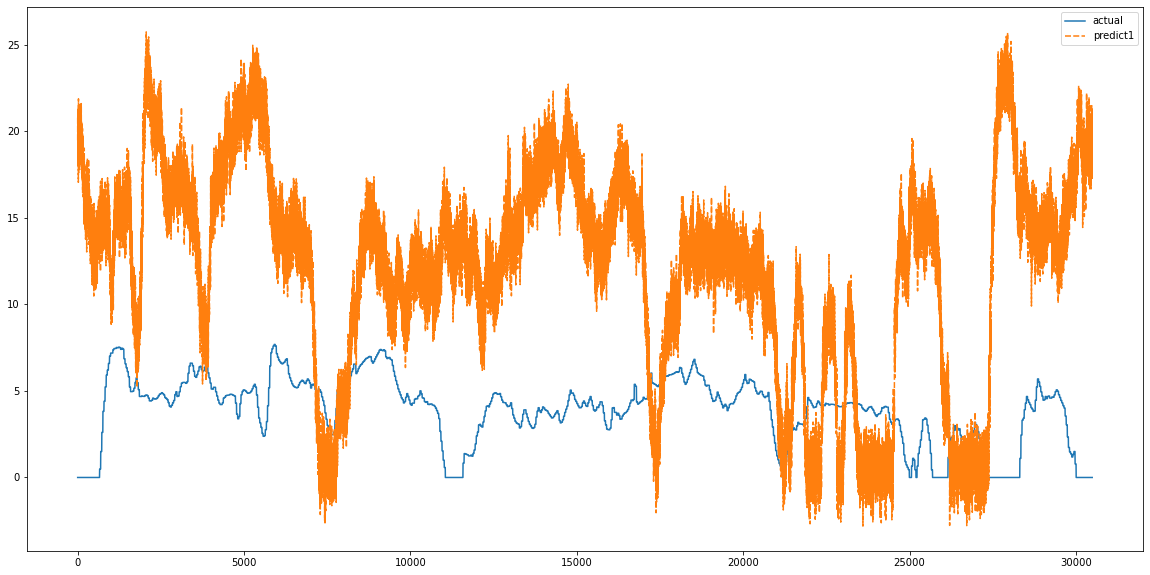

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_speed = data[["actual", "predict1"]]
plt.figure(figsize=(20,10))
sns.lineplot(data=actual_speed)
plt.show()

In [13]:
actual_speed

,actual,predict1
0,0.0,20.792572
1,0.0,19.428677
2,0.0,20.007258
3,0.0,21.269413
4,0.0,20.896078
...,...,...
30482,0.0,18.439183
30483,0.0,20.028197
30484,0.0,17.293372
30485,0.0,19.587188


## Building the Synchronization function:

In [14]:
from fastdtw import *
from scipy.spatial.distance import *

def synchronizise(column1, column2):
    data[column1] = data[column1].fillna(data[column1].mean())
    data[column2] = data[column2].fillna(data[column2].mean())
    x = data[column1]
    y = data[column2]
    
    # using the dynamic time warping model:
    distance, path = fastdtw(x, y, dist=euclidean)
    result = []
    for i in range(0,len(path)):
        result.append([data[column1].iloc[path[i][0]], data[column2].iloc[path[i][1]]])
        
    data_sync = pd.DataFrame(data=result,columns=[column1, column2])
    return data_sync

In [15]:
data_sync = synchronizise('actual', 'predict1')

In [40]:
data_sync

,actual,predict1
0,0.0,20.792572
1,0.0,19.428677
2,0.0,20.007258
3,0.0,21.269413
4,0.0,20.896078
...,...,...
52451,0.0,18.439183
52452,0.0,20.028197
52453,0.0,17.293372
52454,0.0,19.587188


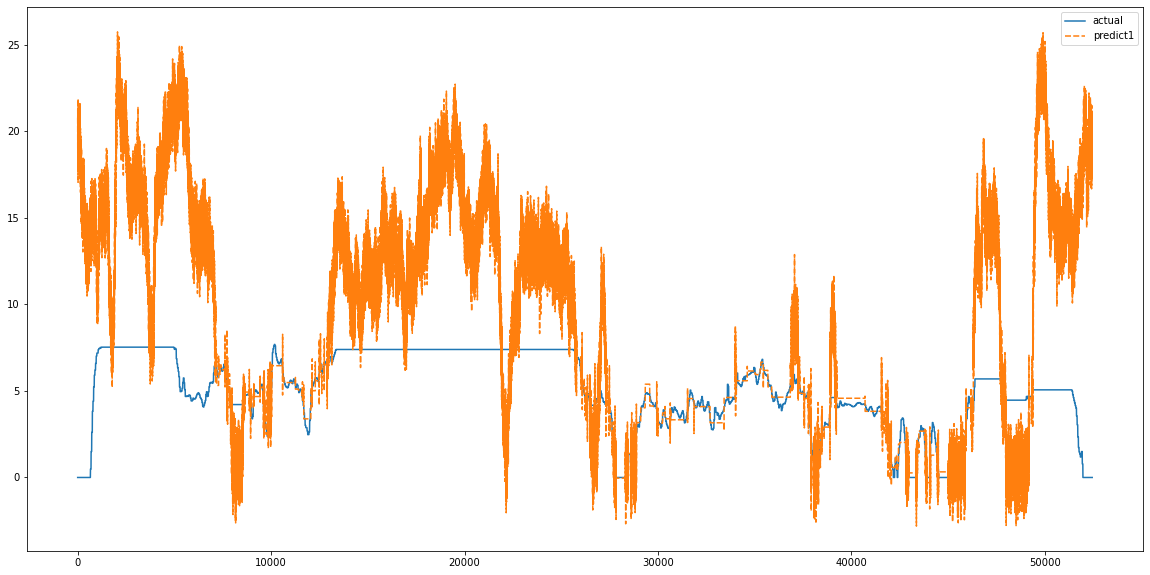

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

actual_speed = data_sync[["actual", "predict1"]]
plt.figure(figsize=(20,10))
sns.lineplot(data=actual_speed)
plt.show()

### EXPLORATORY DATA  ANALYSIS ON THE UNSYNCHED DATASET

In [17]:
actual_speed

,actual,predict1
0,0.0,20.792572
1,0.0,19.428677
2,0.0,20.007258
3,0.0,21.269413
4,0.0,20.896078
...,...,...
52451,0.0,18.439183
52452,0.0,20.028197
52453,0.0,17.293372
52454,0.0,19.587188


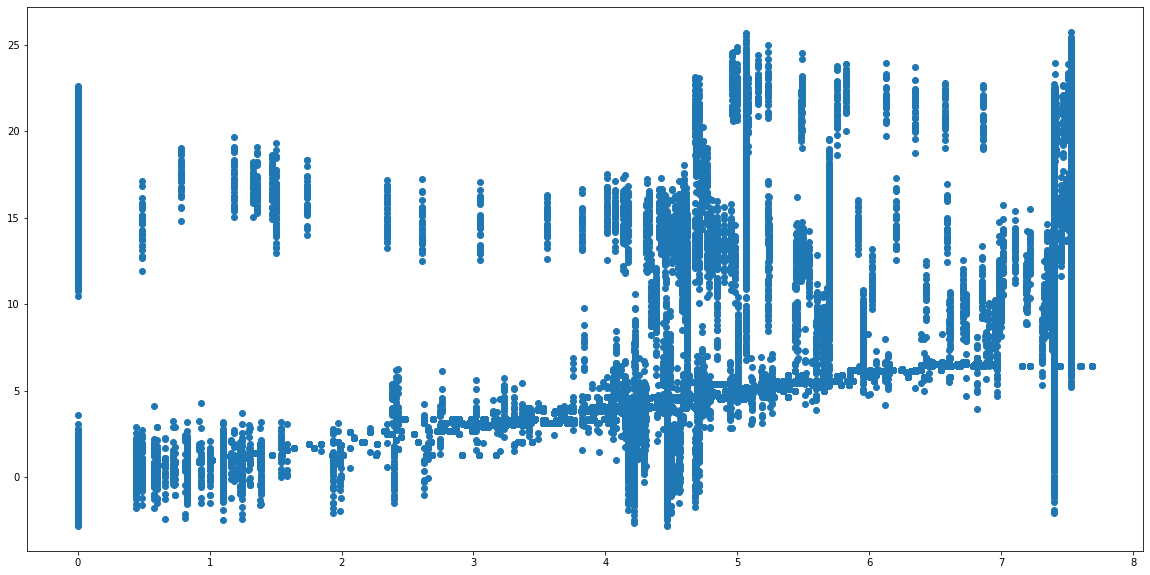

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(actual_speed['actual'], actual_speed['predict1'])
plt.show()

In [27]:
actual_speed.describe(include='all')

,actual,predict1
count,52456.000000,52456.000000
mean,5.045396,8.707274
std,2.236067,6.216034
min,0.000000,-2.810257
25%,4.055833,3.823471
50%,5.064930,6.460467
75%,7.398213,13.904650
max,7.689410,25.753746
